## Lesson 3 homework
### Due Friday 11:59pm

Use the data from the titanic (provided), to create 6 plots in the following layout: 

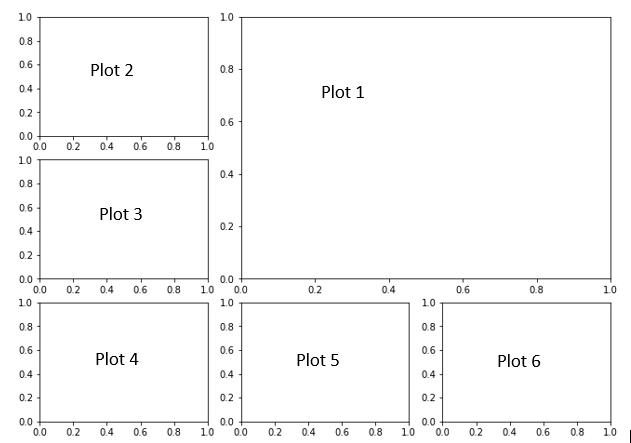

Plot 1: Scatter plot of 'number of people on board'(y) vs 'Age of person'(x)
Plot 2: Histogram of the Age of people on board
Plot 3 - 5:  Your Choice
Plot 6: Pie chart of the number of females in 1st, 2nd and 3rd class that died.  
```python
raw=pd.read_csv('titanic.csv')
raw.head()
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

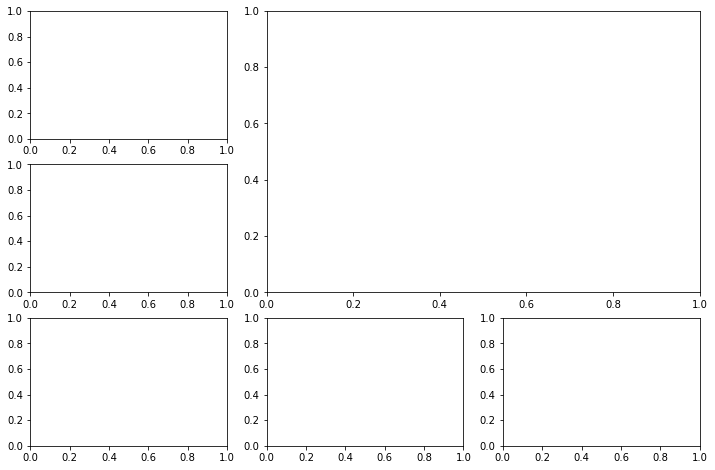

In [2]:
gridsize = (3, 3)
fig = plt.figure(figsize=(12, 8)) #overall size of figure
# numbering follows that given in the figure above
ax1 = plt.subplot2grid(gridsize, (0, 1), colspan=2, rowspan=2) # span 2 col and 2 rows
ax2 = plt.subplot2grid(gridsize, (0, 0)) 
ax3 = plt.subplot2grid(gridsize, (1, 0)) 
ax4 = plt.subplot2grid(gridsize, (2, 0)) 
ax5 = plt.subplot2grid(gridsize, (2, 1)) 
ax6 = plt.subplot2grid(gridsize, (2, 2)) 

#### read data

In [3]:
raw=pd.read_csv('titanic.csv')
raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data=raw.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#### data for plot 1 - age vs count

In [5]:
# let's group data by age and count the number of Fares paid 
age_count=data.groupby('Age').count().loc[:,'Fare']
age_count.tail()
# in this series form 'Age' is the index and our data is the only column 0
# therefore xdata is age_count.index and ydata is just age_count

Age
70.0    2
70.5    1
71.0    2
74.0    1
80.0    1
Name: Fare, dtype: int64

#### data for plot 2 - age data

In [15]:
dataplot2=data.loc[:,"Age"]
dataplot2

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### data for plot 6 - pie females that died vs class

In [16]:
# we want number of female passengers in 1st, 2nd, and 3rd class that died
# first groupby these three categories and unstack twice
temp=data.groupby(['Sex', 'Pclass', 'Survived']).count().unstack().unstack()
female_died_byclass=temp.loc['female',("Fare",0)]
female_died_byclass

Pclass
1     3
2     6
3    72
Name: female, dtype: int64

Below is all the required elements.  The remaining plots are student choice. 

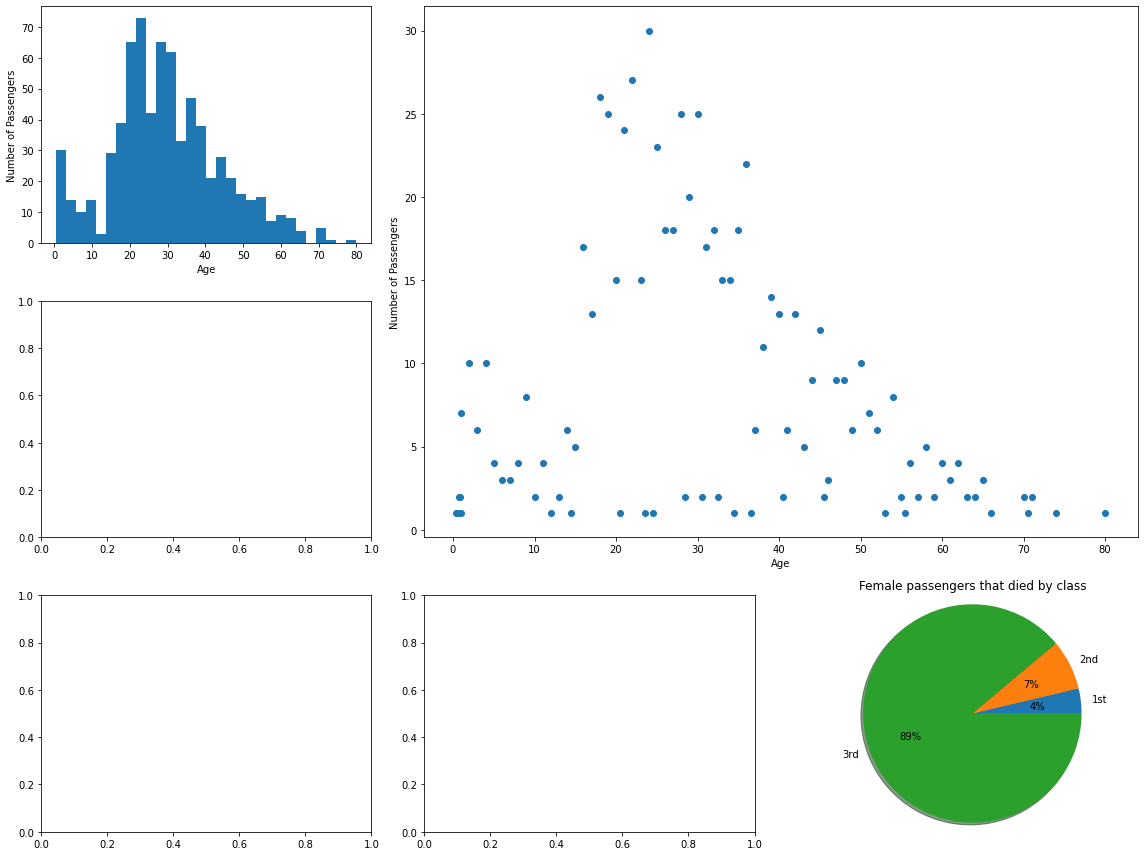

In [17]:
gridsize = (3, 3)
fig = plt.figure(figsize=(16, 12)) #overall size of figure
# numbering follows that given in the figure above
ax1 = plt.subplot2grid(gridsize, (0, 1), colspan=2, rowspan=2) # span 2 col and 2 rows
ax2 = plt.subplot2grid(gridsize, (0, 0)) 
ax3 = plt.subplot2grid(gridsize, (1, 0)) 
ax4 = plt.subplot2grid(gridsize, (2, 0)) 
ax5 = plt.subplot2grid(gridsize, (2, 1)) 
ax6 = plt.subplot2grid(gridsize, (2, 2)) 

ax1.scatter(age_count.index, age_count)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Passengers')

ax2.hist(dataplot2, bins=30)
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Passengers')

labels=['1st','2nd','3rd']
ax6.pie(female_died_byclass, labels=labels, autopct='%1.0f%%',shadow=True, startangle=0)
ax6.axis('equal')
ax6.set_title('Female passengers that died by class')

plt.tight_layout() #removes overlapping of axis labels between plots